In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
models_path = '/home3/ebrahim/TNEC_paper_code/saved_models/'
save_figure_path = '/home3/ebrahim/TNEC_paper_code/figures/'

In [7]:
def load_lists(path):
    #print("Accuracy List:", np.load(path + 'accuracy_list.npy'))
    #print("Accuracy mean:", np.mean(np.load(path + 'accuracy_list.npy')))
    #print("Val loss:", np.mean(np.load(path + 'accuracy_list.npy')))
    #with open(path + 'hyper_params.txt') as f:
    #    contents = f.read()
    #print("Hyperparameters:", contents) 
    return np.mean(np.load(path + 'accuracy_list.npy'))

In [8]:
quarters = ['q1', 'q2', 'q3', 'q4']
mm_list = ['A', 'B', 'C']
participants = ['509', '493', '489', '487']
kfold_accuracy_values = []
for q in quarters:
    for mm in mm_list:
        for p in participants:
            try:
                kfold_accuracy_values.append(load_lists(models_path + mm + '_' + q + '_' + p + '_kfold/'))
            except:
                print(mm, q, p)

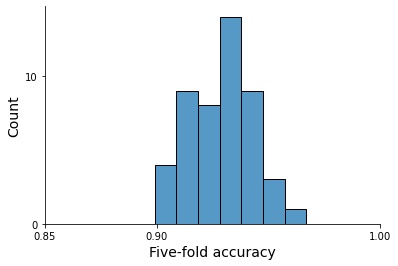

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
sns.despine()
ax.set_ylabel("Count", fontsize=14)
ax.set_yticks([0, 10, 15])
ax.set_xticks([.85, .9, 1])
ax.set_xlim([.85,1])
ax.set_xlabel("Five-fold accuracy", fontsize=14)
sns.histplot(kfold_accuracy_values, ax=ax)
plt.savefig(save_figure_path + 'kfold_accuracy.pdf', format='pdf', bbox_inches='tight')